In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train= pd.read_csv("C:/Users/vaibhav semwal/Desktop/train (1).csv")
test= pd.read_csv("C:/Users/vaibhav semwal/Desktop/test.csv")

In [3]:
train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [4]:
test.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6


In [5]:
train['train_y_n']=1
test['train_y_n']=0
all=pd.concat([train,test])

In [6]:
all.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


<AxesSubplot:>

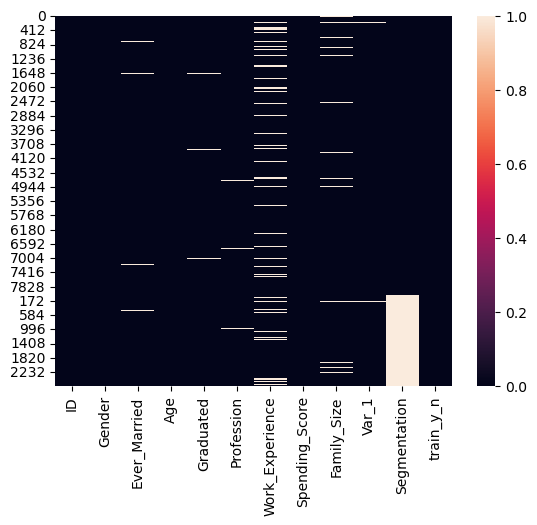

In [7]:
#Visualization to check for missing values
sns.heatmap(all.isna())

In [8]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
 11  train_y_n        10695 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.1+ MB


In [9]:
all.describe()

,ID,Age,Work_Experience,Family_Size,train_y_n
count,10695.000000,10695.000000,9597.000000,10247.000000,10695.000000
mean,463468.088640,43.511828,2.619777,2.844052,0.754371
std,2600.966411,16.774158,3.390790,1.536427,0.430480
min,458982.000000,18.000000,0.000000,1.000000,0.000000
25%,461220.500000,30.000000,0.000000,2.000000,1.000000
50%,463451.000000,41.000000,1.000000,3.000000,1.000000
75%,465733.500000,53.000000,4.000000,4.000000,1.000000
max,467974.000000,89.000000,14.000000,9.000000,1.000000


In [10]:
#ID
all['ID'].value_counts()>1

460802     True
466166     True
459161     True
463138     True
467570     True
          ...  
467760    False
459108    False
459200    False
462945    False
467968    False
Name: ID, Length: 8363, dtype: bool

In [11]:
sum(all['ID'].value_counts()>1)

2332

In [12]:
all[all['train_y_n']==0]['ID'].nunique()

2627

In [13]:
2332/2627

0.8877046060144652

In [14]:
all[all['ID']==462826]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n
5526,462826,Male,No,22,No,Healthcare,0.0,Low,3.0,Cat_3,D,1
1146,462826,Male,No,20,No,Healthcare,1.0,Low,3.0,Cat_3,NaN,0


In [15]:
sum(all.groupby(['ID','train_y_n'])['ID'].count()>1)

0

<AxesSubplot:xlabel='Gender', ylabel='count'>

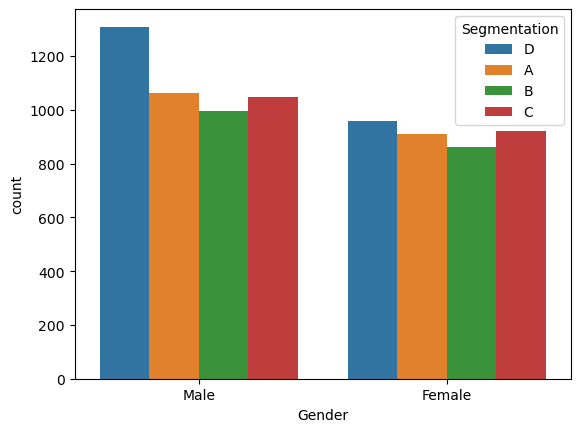

In [16]:
#Gender
sns.countplot(all['Gender'],hue=all['Segmentation'])

In [17]:
groupby_df = all[all['train_y_n']==1].groupby(['Gender', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                     Segmentation
 Gender Segmentation              
 Female A                      909
        B                      861
        C                      922
        D                      959
 Male   A                     1063
        B                      997
        C                     1048
        D                     1309,
                      Segmentation
 Gender Segmentation              
 Female A                    24.90
        B                    23.58
        C                    25.25
        D                    26.27
 Male   A                    24.07
        B                    22.57
        C                    23.73
        D                    29.64)

<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

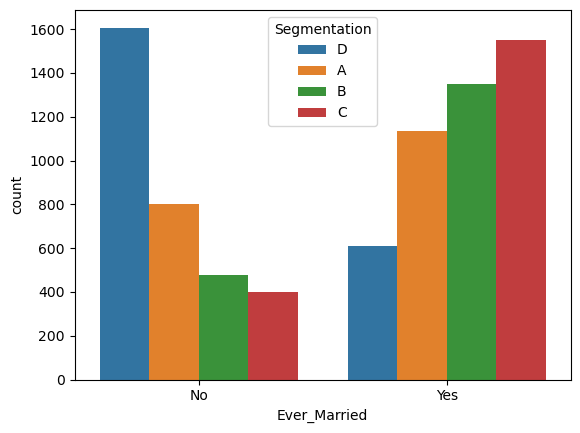

In [18]:
#Ever_Married
sns.countplot(all['Ever_Married'],hue=all['Segmentation'])

In [19]:
groupby_df = all[all['train_y_n']==1].groupby(['Ever_Married', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                           Segmentation
 Ever_Married Segmentation              
 No           A                      801
              B                      479
              C                      398
              D                     1607
 Yes          A                     1137
              B                     1348
              C                     1549
              D                      609,
                            Segmentation
 Ever_Married Segmentation              
 No           A                    24.38
              B                    14.58
              C                    12.12
              D                    48.92
 Yes          A                    24.49
              B                    29.03
              C                    33.36
              D                    13.12)

In [20]:
sum(all['Ever_Married'].isnull())

190

<AxesSubplot:xlabel='Age', ylabel='Density'>

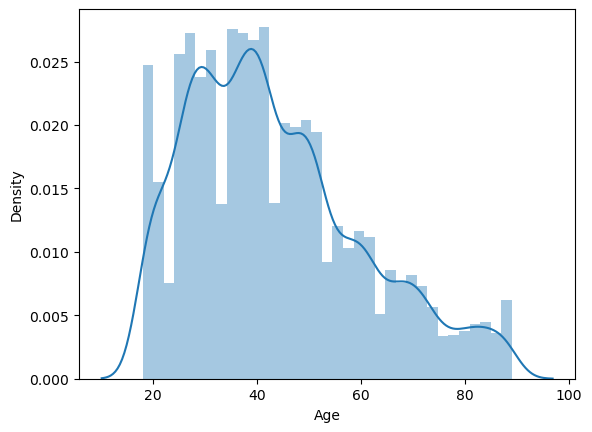

In [21]:
#Age
sns.distplot(all['Age'])

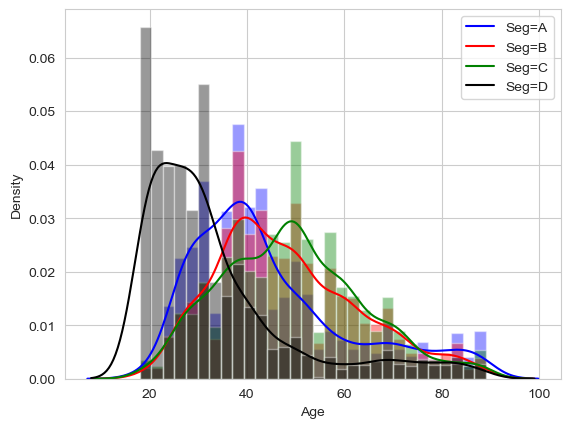

In [22]:
sns.set_style('whitegrid')
sns.distplot(all[all['Segmentation']=='A']['Age'],bins=30,color='blue')
sns.distplot(all[all['Segmentation']=='B']['Age'],bins=30,color='red')
sns.distplot(all[all['Segmentation']=='C']['Age'],bins=30,color='green')
sns.distplot(all[all['Segmentation']=='D']['Age'],bins=30,color='black')
plt.legend(labels=['Seg=A', 'Seg=B', 'Seg=C','Seg=D'])

<AxesSubplot:xlabel='Graduated', ylabel='count'>

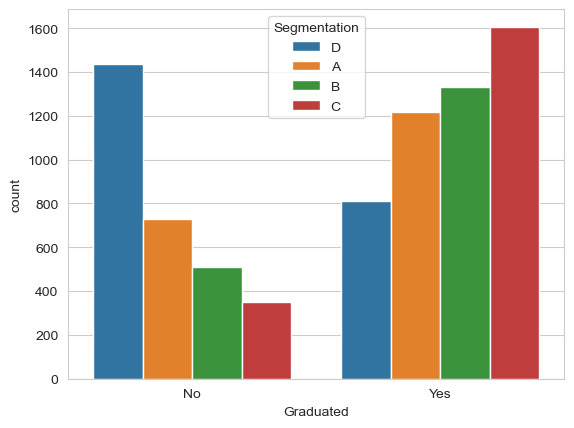

In [23]:
#Graduated
sns.countplot(all['Graduated'],hue=all['Segmentation'])

In [24]:
groupby_df = all[all['train_y_n']==1].groupby(['Graduated', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                        Segmentation
 Graduated Segmentation              
 No        A                      729
           B                      508
           C                      348
           D                     1437
 Yes       A                     1219
           B                     1332
           C                     1607
           D                      810,
                         Segmentation
 Graduated Segmentation              
 No        A                    24.12
           B                    16.81
           C                    11.52
           D                    47.55
 Yes       A                    24.54
           B                    26.81
           C                    32.35
           D                    16.30)

<AxesSubplot:xlabel='Profession', ylabel='count'>

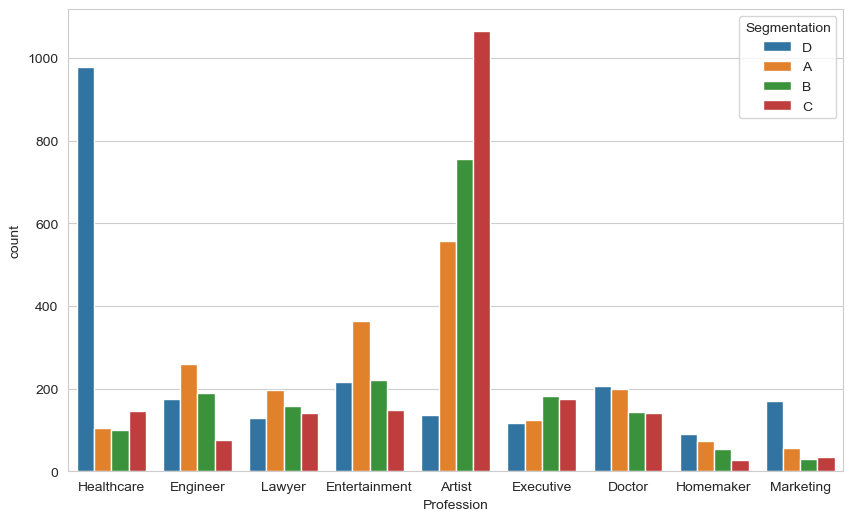

In [25]:
#Profession
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(all['Profession'],hue=all['Segmentation'])

<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

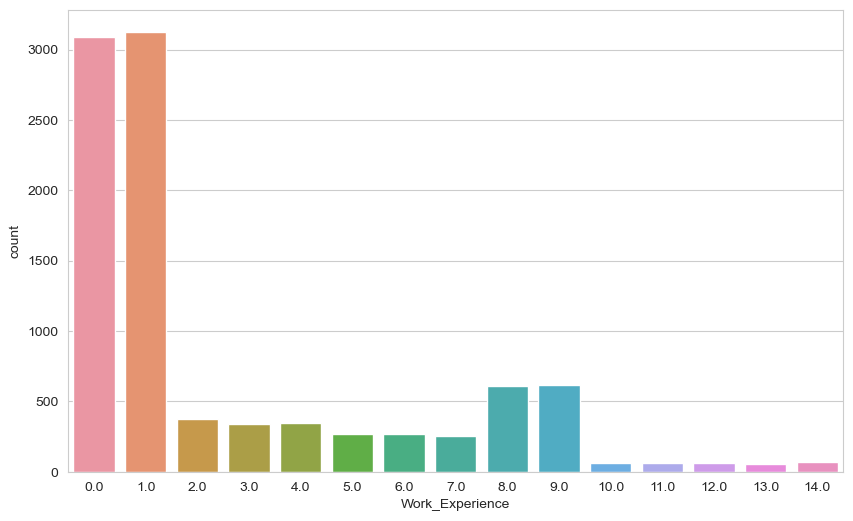

In [26]:
#Work_Experience
sns.countplot(all['Work_Experience'])

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

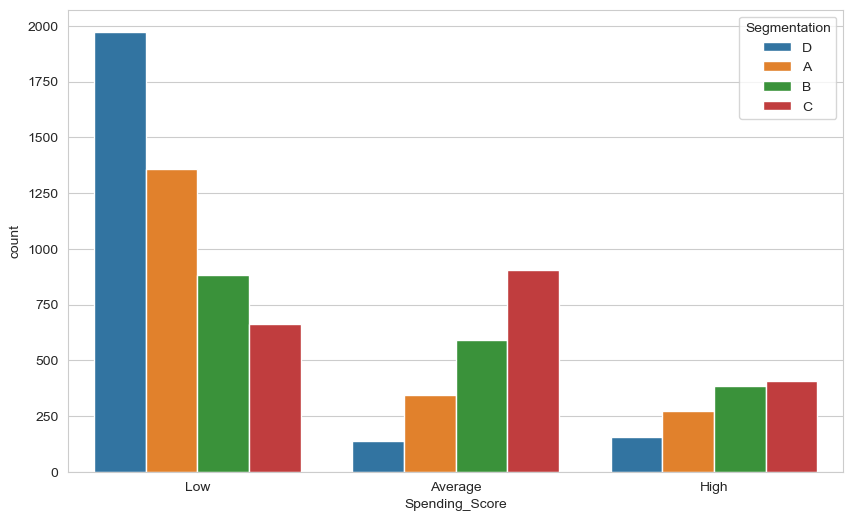

In [27]:
#Spending_Score
sns.countplot(all['Spending_Score'],hue=all['Segmentation'])

In [28]:
groupby_df = all[all['train_y_n']==1].groupby(['Spending_Score', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                             Segmentation
 Spending_Score Segmentation              
 Average        A                      343
                B                      590
                C                      903
                D                      138
 High           A                      271
                B                      384
                C                      405
                D                      156
 Low            A                     1358
                B                      884
                C                      662
                D                     1974,
                              Segmentation
 Spending_Score Segmentation              
 Average        A                    17.38
                B                    29.89
                C                    45.74
                D                     6.99
 High           A                    22.29
                B                    31.58
                C                    33.31
          

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

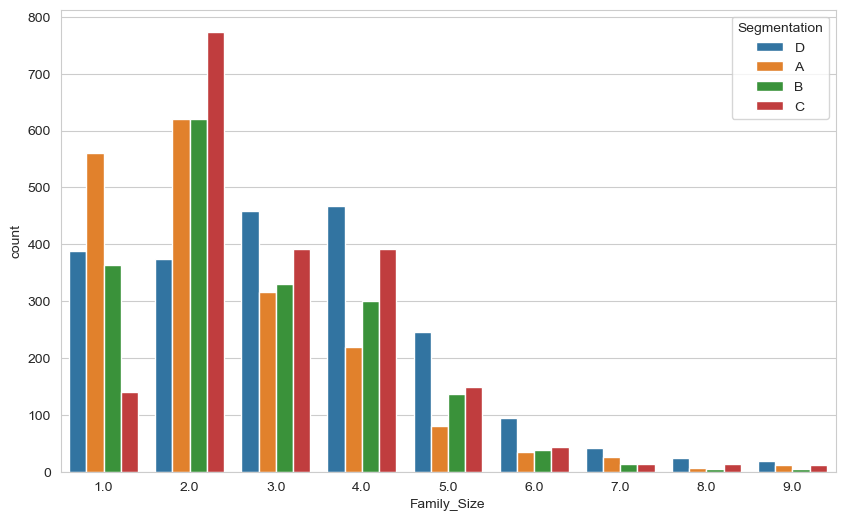

In [29]:
#Family_Size
sns.countplot(all['Family_Size'],hue=all['Segmentation'])

<AxesSubplot:xlabel='Var_1', ylabel='count'>

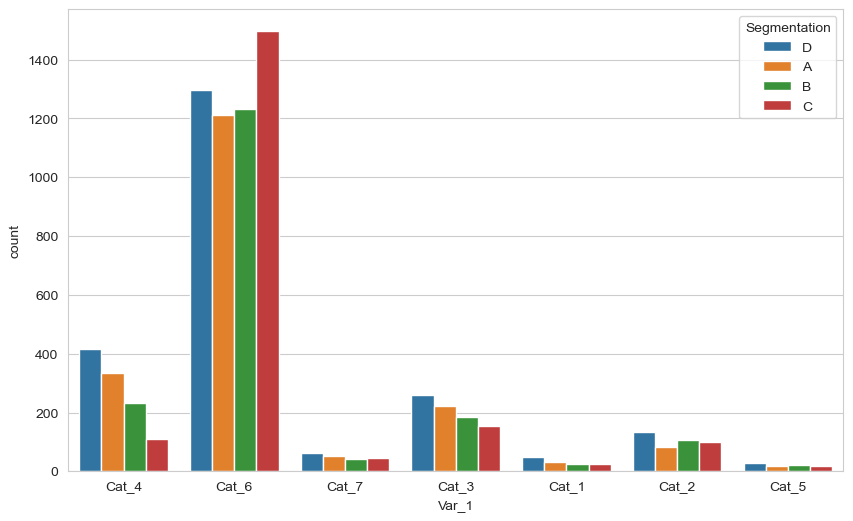

In [30]:
#Var_1
sns.countplot(all['Var_1'],hue=all['Segmentation'])

## Bivariate Analysis

In [31]:
all.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
train_y_n            int64
dtype: object

<AxesSubplot:>

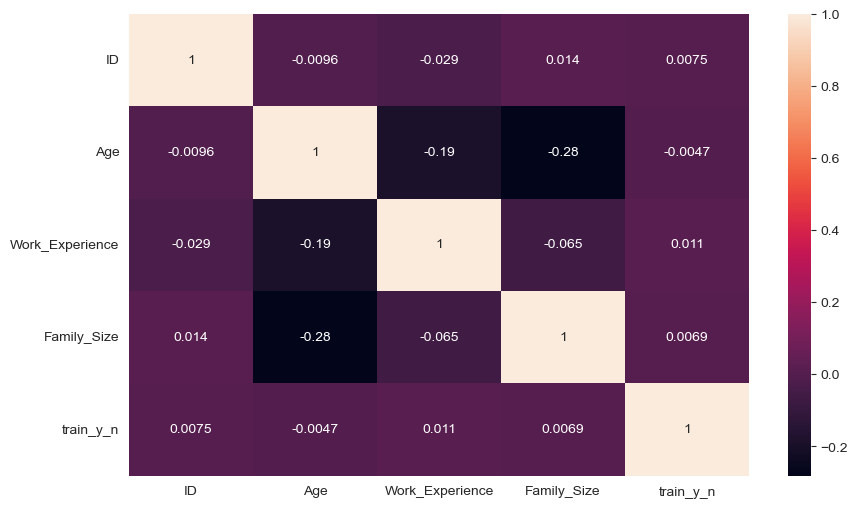

In [32]:
sns.heatmap(all.corr(),annot=True)

In [33]:
feature_cols = all.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols.remove('train_y_n')
label_col = 'Segmentation'
print(feature_cols)

['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']


In [34]:
all.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
train_y_n             0
dtype: int64

In [35]:
#Gender
all=pd.get_dummies(all,prefix='Gender',columns=['Gender'],drop_first=True)

In [36]:
all.head(2)

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n,Gender_Male
0,462809,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1,1
1,462643,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1,0


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

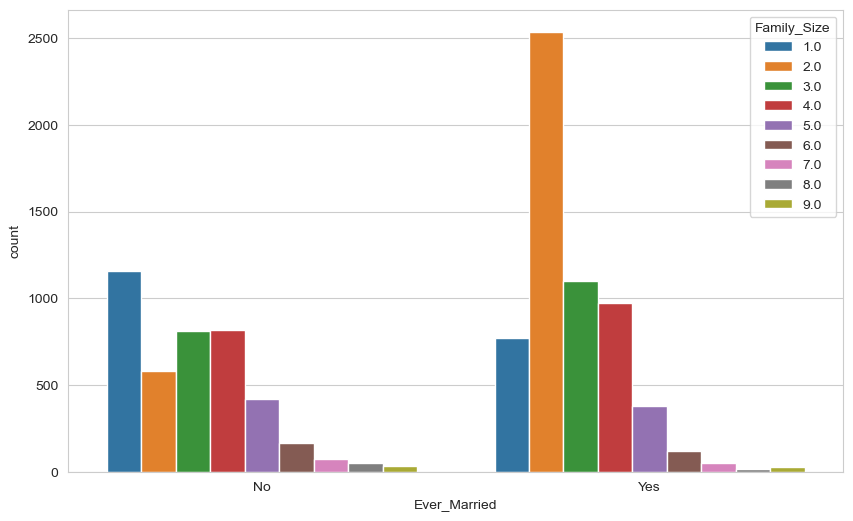

In [37]:
#Ever_Married
sns.countplot(all['Ever_Married'],hue=all['Family_Size'])

In [38]:
all[all['Ever_Married'].isnull()]['Family_Size'].value_counts()

3.0    45
2.0    40
1.0    34
4.0    32
5.0    17
6.0     5
8.0     2
7.0     1
Name: Family_Size, dtype: int64

In [39]:
all['Ever_Married']=all['Ever_Married'].fillna('Yes')

In [40]:
all=pd.get_dummies(all,prefix='Married',columns=['Ever_Married'],drop_first=True)

In [41]:
all.head(2)

,ID,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n,Gender_Male,Married_Yes
0,462809,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1,1,0
1,462643,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1,0,1


<AxesSubplot:xlabel='Graduated', ylabel='count'>

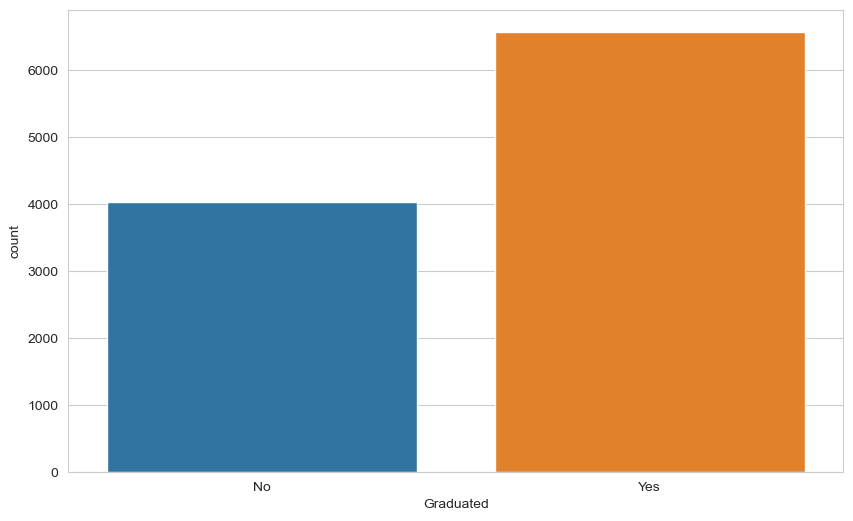

In [42]:
#Graduated
sns.countplot(all['Graduated'])

In [43]:
all['Graduated']=all['Graduated'].fillna('Yes')

In [44]:
all=pd.get_dummies(all,prefix='Graduated',columns=['Graduated'],drop_first=True)
all.head(2)

,ID,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n,Gender_Male,Married_Yes,Graduated_Yes
0,462809,22,Healthcare,1.0,Low,4.0,Cat_4,D,1,1,0,0
1,462643,38,Engineer,NaN,Average,3.0,Cat_4,A,1,0,1,1


In [45]:
#Profession
all['Profession'].fillna('Unknown',inplace=True)

In [46]:
all['Profession']=all['Profession'].astype('str')

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
all['Profession_en']=le.fit_transform(all['Profession'])

<AxesSubplot:xlabel='Profession_en', ylabel='count'>

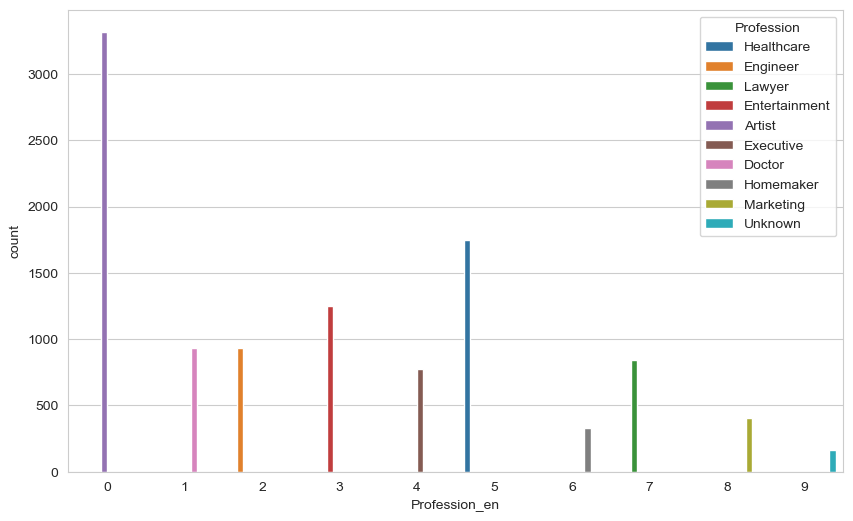

In [48]:
sns.countplot(all['Profession_en'],hue=all['Profession'])

In [49]:
all['Profession_en'].value_counts()

0    3318
5    1750
3    1250
2     935
1     930
7     844
4     775
8     403
6     328
9     162
Name: Profession_en, dtype: int64

In [50]:
all.drop('Profession',axis=1,inplace=True)

In [51]:
#Work_Experience
all['Work_Experience'].fillna(all['Work_Experience'].mean(),inplace=True)

In [52]:
#Spending_Score
all.loc[all['Spending_Score']=='Low','Spending_Score']=1
all.loc[all['Spending_Score']=='Average','Spending_Score']=2
all.loc[all['Spending_Score']=='High','Spending_Score']=3
all['Spending_Score']=all['Spending_Score'].astype('int')

In [53]:
#Family_Size
all['Family_Size'].fillna(round(all['Family_Size'].mean()),inplace=True)

In [54]:
#Var_1
all['Var_1'].fillna('Cat_6',inplace=True)
all['Var_1']=all['Var_1'].apply(lambda x:x[-1])
all['Var_1']=all['Var_1'].astype('int')

In [55]:
#Train & Test Split
from sklearn.model_selection import train_test_split
df_train, df_eval = train_test_split(all[all['train_y_n']==1],
test_size=0.40, random_state=101, shuffle=True, 
stratify=all[all['train_y_n']==1][label_col])

In [56]:
le = preprocessing.LabelEncoder()
df_train['Segmentation']=le.fit_transform(df_train['Segmentation'])
df_eval['Segmentation']=le.fit_transform(df_eval['Segmentation'])

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 6452 to 4455
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4840 non-null   int64  
 1   Age              4840 non-null   int64  
 2   Work_Experience  4840 non-null   float64
 3   Spending_Score   4840 non-null   int32  
 4   Family_Size      4840 non-null   float64
 5   Var_1            4840 non-null   int32  
 6   Segmentation     4840 non-null   int32  
 7   train_y_n        4840 non-null   int64  
 8   Gender_Male      4840 non-null   uint8  
 9   Married_Yes      4840 non-null   uint8  
 10  Graduated_Yes    4840 non-null   uint8  
 11  Profession_en    4840 non-null   int32  
dtypes: float64(2), int32(4), int64(3), uint8(3)
memory usage: 316.7 KB


In [58]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228 entries, 6457 to 1140
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3228 non-null   int64  
 1   Age              3228 non-null   int64  
 2   Work_Experience  3228 non-null   float64
 3   Spending_Score   3228 non-null   int32  
 4   Family_Size      3228 non-null   float64
 5   Var_1            3228 non-null   int32  
 6   Segmentation     3228 non-null   int32  
 7   train_y_n        3228 non-null   int64  
 8   Gender_Male      3228 non-null   uint8  
 9   Married_Yes      3228 non-null   uint8  
 10  Graduated_Yes    3228 non-null   uint8  
 11  Profession_en    3228 non-null   int32  
dtypes: float64(2), int32(4), int64(3), uint8(3)
memory usage: 211.2 KB


In [59]:
#pip install lightgbm

In [60]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter
sns.set_style('whitegrid')

In [61]:
params = {}
params['learning_rate'] = 0.04
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
#params['class_weight']: {0: 0.44, 1: 0.4, 2: 0.37}

In [62]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols.remove('train_y_n')
label_col = 'Segmentation'
print(feature_cols)

['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Gender_Male', 'Married_Yes', 'Graduated_Yes', 'Profession_en']


In [63]:
cat_cols=['Spending_Score','Family_Size','Var_1','Gender_Male','Married_Yes','Graduated_Yes','Profession_en']

In [64]:
clf = lgb.LGBMClassifier(**params)
    
clf.fit(df_train[feature_cols], df_train[label_col], early_stopping_rounds=100, eval_set=[(df_train[feature_cols], df_train[label_col]), (df_eval[feature_cols], df_eval[label_col])], eval_metric='multi_error', verbose=True, categorical_feature=cat_cols)

eval_score = accuracy_score(df_eval[label_col], clf.predict(df_eval[feature_cols]))

print('Eval ACC: {}'.format(eval_score))

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[1]	valid_0's multi_error: 0.719008	valid_0's multi_logloss: 1.36412	valid_1's multi_error: 0.718711	valid_1's multi_logloss: 1.36509
[2]	valid_0's multi_error: 0.628099	valid_0's multi_logloss: 1.34506	valid_1's multi_error: 0.629182	valid_1's multi_logloss: 1.34735
[3]	valid_0's multi_error: 0.551033	valid_0's multi_logloss: 1.32565	valid_1's multi_error: 0.562268	valid_1's multi_logloss: 1.3289
[4]	valid_0's multi_error: 0.531198	valid_0's multi_logloss: 1.30789	valid_1's multi_error: 0.537485	valid_1's multi_logloss: 1.31214
[5]	valid_0's multi_error: 0.507025	valid_0's multi_logloss: 1.29435	valid_1's multi_error: 0.520446	valid_1's multi_logloss: 1.30016
[6]	valid_0's multi_error: 0.484298	valid_0's multi_logloss: 1.27904	valid_1's multi_error: 0.50031	valid_1's multi_logloss: 1.28601
[7]	valid_0's multi_error: 0.464256	valid_0's multi_logloss: 1.26468	valid_1

In [65]:
test=all[all['train_y_n']==0]
train=all[all['train_y_n']==1]

In [66]:
sub=pd.merge(left=test['ID'],right=train[['ID','Segmentation']],how='left',on='ID')

In [67]:
actual_test=(test[test['ID'].isin(train['ID'])==False])

In [68]:
actual_test.shape

(295, 12)

In [69]:
pred=clf.predict(actual_test[feature_cols])

In [70]:
pred=le.inverse_transform(pred)
actual_test['Segmentation']=pred

In [71]:
l=actual_test[['ID','Segmentation']]
r=sub[sub['Segmentation'].isnull()==False]
fr=[l,r]
sub=pd.concat(fr)

In [73]:
sub[['ID','Segmentation']].to_csv('submission.csv',index = True)